🎯 Desafio dia 74 — Consumo de Energia Residencial

📂 Dataset: desafio_dia_74_consumo_energia.csv

🔍 Contexto: Você faz parte de uma empresa de energia que está estudando os padrões de consumo das residências em diferentes estados. O objetivo é entender como variáveis como renda, tipo de residência e uso de ar-condicionado influenciam o consumo mensal em kWh.

🛠️ Tarefas do desafio:
🧹 Tratamento de dados

    Preencha os valores ausentes de consumo_kwh_mes com a mediana por tipo de residência.

    Preencha os valores ausentes de uso_ar_condicionado com o valor mais frequente (moda).

📊 Análise geral

    Qual estado tem o maior consumo médio mensal?

    Existe alguma diferença significativa entre casas e apartamentos em relação ao consumo médio?

📈 Visualização de dados

    Crie um boxplot do consumo mensal (consumo_kwh_mes) por faixa de renda.

🤖 Machine Learning - Regressão

    Crie um modelo de regressão (RandomForestRegressor) para prever consumo_kwh_mes com base em:

        estado, tipo_residencia, faixa_renda, uso_ar_condicionado

    Use train_test_split e pd.get_dummies para preparar os dados.

    Avalie a performance do modelo com mean_squared_error.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_74_consumo_energia.csv")
df.head()

,id_residencia,estado,tipo_residencia,faixa_renda,consumo_kwh_mes,uso_ar_condicionado
0,2001,BA,Casa,Média,NaN,Não
1,2002,RJ,Apartamento,Baixa,294.6,Não
2,2003,RJ,Casa,Baixa,247.7,Sim
3,2004,RS,Casa,Média,257.0,Sim
4,2005,RJ,Casa,Baixa,248.0,Sim


In [4]:
#Preencha os valores ausentes de consumo_kwh_mes com a mediana por tipo de residência.
df["consumo_kwh_mes"] = df["consumo_kwh_mes"].fillna(
    df.groupby("tipo_residencia")["consumo_kwh_mes"].transform("median")
)
df["consumo_kwh_mes"].isna().sum()

np.int64(0)

In [5]:
#Preencha os valores ausentes de uso_ar_condicionado com o valor mais frequente (moda).
df["uso_ar_condicionado"] = df["uso_ar_condicionado"].fillna(df["uso_ar_condicionado"].mode()[0])
df["uso_ar_condicionado"].isna().sum()

np.int64(0)

In [8]:
#Qual estado tem o maior consumo médio mensal?
estado_consumo_mensal = df.groupby("estado")["consumo_kwh_mes"].mean().sort_values(ascending=False)
print(estado_consumo_mensal)

estado
RJ    226.034483
RS    220.331429
BA    218.348421
SP    216.893617
MG    212.673034
Name: consumo_kwh_mes, dtype: float64


In [9]:
#Existe alguma diferença significativa entre casas e apartamentos em relação ao consumo médio?
consumo_por_residencia = df.groupby("tipo_residencia")["consumo_kwh_mes"].mean()
print(consumo_por_residencia)

tipo_residencia
Apartamento    219.869869
Casa           217.878008
Name: consumo_kwh_mes, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

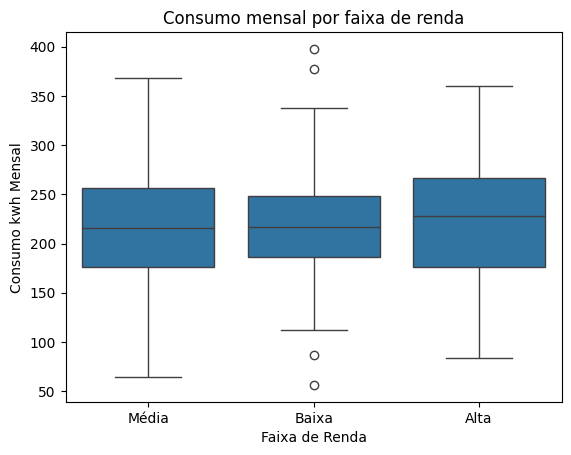

In [11]:
#Crie um boxplot do consumo mensal (consumo_kwh_mes) por faixa de renda.
sns.boxplot(data=df, x="faixa_renda", y="consumo_kwh_mes")
plt.title("Consumo mensal por faixa de renda")
plt.ylabel("Consumo kwh Mensal")
plt.xlabel("Faixa de Renda")
plt.show

In [13]:
#Crie um modelo de regressão (RandomForestRegressor) para prever consumo_kwh_mes com base em:
X = df[["estado", "tipo_residencia", "faixa_renda", "uso_ar_condicionado"]]
y = df["consumo_kwh_mes"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

4847.73065021849
